In [5]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans

In [6]:
df = pd.read_csv("concrete.csv")

In [7]:
df.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [31]:
km = KMeans(n_clusters=4)
scaler = MinMaxScaler()

In [38]:
for i in df.columns:
    df[i]= scaler.fit_transform(df[[i]])

In [39]:
df.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
0,1.000000,0.000000,0.0,0.321086,0.07764,0.694767,0.205720,0.074176,0.967485
1,1.000000,0.000000,0.0,0.321086,0.07764,0.738372,0.205720,0.074176,0.741996
2,0.526256,0.396494,0.0,0.848243,0.00000,0.380814,0.000000,0.739011,0.472655
3,0.526256,0.396494,0.0,0.848243,0.00000,0.380814,0.000000,1.000000,0.482372
4,0.220548,0.368392,0.0,0.560703,0.00000,0.515698,0.580783,0.986264,0.522860


In [42]:
km.fit(df)

KMeans(n_clusters=4)

In [44]:
km.predict(df)

array([3, 0, 0, ..., 1, 2, 1])

In [45]:
#Lets use elbow method now
sse = []
for i in range(1,10):
    km = KMeans(n_clusters=i)
    km.fit(df)
    sse.append(km.inertia_)

In [46]:
sse

[458.25241498631453,
 339.6592261175502,
 286.500691970295,
 244.19804460410296,
 219.11192134492117,
 195.8333807554411,
 180.26670195504641,
 166.83939708350482,
 156.57388411050175]

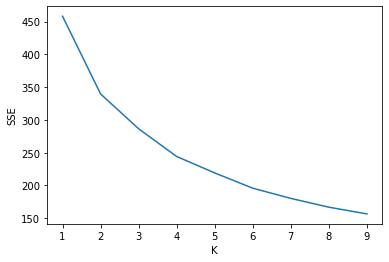

In [47]:
plt.xlabel("K")
plt.ylabel("SSE")
plt.plot(range(1,10),sse)